In [45]:
import numpy as np 
import scipy as cp
import matplotlib.pyplot as plt

## Exercice FFT

### Exercice 1
- Pour une fréquence d'échantillonnage de 8kHz, quelle est le nombre d'échantillons minimal requis pour représenter un signal DTMF (cf ex.10.5) si on veut que sa FFT ait une séparation de fréquence minimale de 5 échantillons. 



### Exercice 2

On mesure l'amplitude d'un signal avec un système d'acquisition qui l'échantillonne avec une période d'échantillonnage $f_s$ de 20kHz. La mémoire permet de mesurer 8192 échantillons. La fréquence $f_0$ du signal mesuré change lentement entre 999 et 1001 Hz. On suppose que la variation est négligeable sur une acquisition du signal.
- Quelle est la variation d'amplitude observée par une FFT du signal si on n'utilise pas de fenêtre ?
    - A quel index de la FFT va-t'on trouver l'amplitude maximum du signal.
    - On calculera la résolution en fréquence de la FFT (la résolution correspond au signal de plus basse fréquence qu'on peut représenter sur une période)
    - On calcule la fréquence relative $f_r=f_0/{\Delta f0}$. Les valeurs entières de $f_r$ correspondent aux échantillons retournés par la FFT
    - L'amplitude rendue par la FFT pour une fréquence f est une fonction de la forme . 
    
    $$
    \begin{align}
        A(f)&=sinc(f-f_i)&=\frac{sin(\pi (f-f_i))}{\pi (f-f_i)} \\
        A(x)&=sinc(x)&=\frac{sin(\pi (x))}{\pi (x)}
    \end{align}
    $$
    Cette fonction **doit être centrée** sur la fréquence *réelle* du signal. Quelles sont les valeurs d'amplitudes qu'on devrait observer aux alentours du maximum.
- Vérifiez le résultat en calculant différentes FFT pour la plage de variation de fréquence du signal.
- Pourrait-on calculer l'amplitude exacte du signal à partir d'une mesure (sachant que la fréquence se situe dans la plage définie dans l'exercice) ?

## Exercice 3

Pour la donnée ci-dessus, quelle serait la variation d'amplitude pour une fenêtre de Hanning ou Flattop ?

# Solutions

## Exercice 1

In [26]:
fB=[1209,1336,1477,1633]
fA=[697,770,852,941]
fs=8000
# Calculer la différence de fréquence minimum
# En déduire le $\Delta f$
# En déduire la fréquence d'échantillonnage
DF5=fA[1]-fA[0]
DF=DF5/5
# De DF=fs/N
N=fs/DF
N

547.945205479452

## Exercice 2

In [4]:
# Donnée du problème
fs=20000
f0=1000
N=8192
vf=1 # variation de fréquence

t=np.arange(N)/fs
s=np.sin(2*np.pi*f0*t)

In [6]:
DF=fs/N # pas de fréquence de la FFT
print(f"Le pas de fréquence de la FFT est de {DF} [Hz]")
fr=f0/DF # fréquence du signal relative au pas
fri=np.round(fr)
print(f"On trouvera le maximum à l'index {np.round(fri):.0f}")

Le pas de fréquence de la FFT est de 2.44140625 [Hz]
On trouvera le maximum à l'index 410


In [13]:
ffts=np.abs(np.fft.fft(s))*2/N
ffts[407:413]

array([0.11679336, 0.18956471, 0.50490873, 0.7564696 , 0.21587953,
       0.12578156])

In [14]:
A=np.sinc(410-fr)
A

0.7568267286406825

In [15]:
# Le signal varie de vf. L'amplitude sera maximum quand on est au plus proche de la fréquence qui correspond à l'index 410
fmax=410*DF
print(f"Fréquence maximum fmax={fmax}")

Fréquence maximum fmax=1000.9765625


In [16]:
# La fréquence 1000.97 (1001) donnera une valeur proche de 1
s=np.sin(2*np.pi*(f0+vf)*t)
ffts=np.abs(np.fft.fft(s))*2/N
ffts[405:415]

array([0.00190445, 0.00238232, 0.00317775, 0.0047648 , 0.00949574,
       0.99983689, 0.00970309, 0.00483391, 0.00322127, 0.00241688])

In [17]:
# La fréquence 999 donnera la plus petite valeur
s=np.sin(2*np.pi*(f0-vf)*t)
ffts=np.abs(np.fft.fft(s))*2/N
ffts[405:415]

array([0.04263394, 0.05604166, 0.08169155, 0.1504359 , 0.94128389,
       0.22154379, 0.0991949 , 0.06393941, 0.04719264, 0.03740973])

In [18]:
fr=(f0-vf)/DF # fréquence du signal relative au pas
fri=np.round(fr)
print(f"On trouvera le maximum du signal à l'index {np.round(fri):.0f}")

On trouvera le maximum du signal à l'index 409


In [19]:
# Le signal est plus proche du point précédent dans la FFT (409). Le signal le plus faible sera observé à la fréquence située entre les 2 points
f_min= 409.5*DF
s=np.sin(2*np.pi*(f_min)*t)
ffts=np.abs(np.fft.fft(s))*2/N
ffts[405:415]


array([0.07111347, 0.09132314, 0.12770094, 0.2125831 , 0.6369958 ,
       0.63624422, 0.21183151, 0.12694935, 0.09057154, 0.07036186])

In [20]:
A=np.sinc(0.5)
print(f"L'amplitude minimum observée est {A}")

L'amplitude minimum observée est 0.6366197723675814


Pour le dernier point, si on sait qu'on a un sinus pur, que sa FFT est donc un ensemble de points sur la courbe sinc(f), on peut chercher l'écart de fréquence qui fait correspondre les points mesurés à la fonction sinc. Il est par conséquent possible de retrouver l'amplitude et la fréquence exacte du signal.

## Exercice 3

In [54]:
# On peut calculer la FFT en variant la fréquence relative dans la plage et faire un graphique. On s'attend à une valeur minimale lorsque la fréquence tombe entre 2 fréquences "entières".

# On peut aussi calculer la valeur à partir de la fonction FFT de la fenêtre

# Donnée du problème
fs=20000
f0=1000
N=8192
vf=1 # variation de fréquence

t=np.arange(N)/fs
s=np.sin(2*np.pi*f0*t)



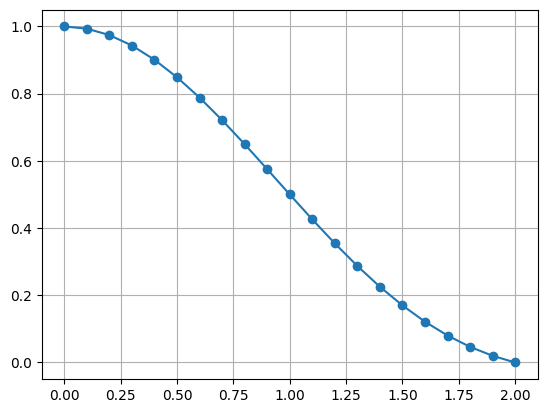

In [55]:
w_large=np.zeros(N*10)
w_large[0:N]=np.hanning(N)
fftw=np.abs(np.fft.fft(w_large))*2/N
rf=np.arange(N*10)/10
plt.plot(rf[0:21],fftw[0:21],'-o')
plt.grid()

In [56]:
print(f"Le facteur entre 2 fréquences serait {fftw[5]}")

Le facteur entre 2 fréquences serait 0.8487572797238906


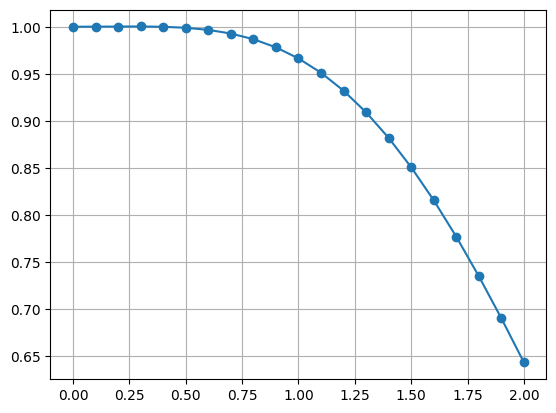

In [57]:
w_large=np.zeros(N*10)
w_large[0:N]=cp.signal.get_window('flattop',N)
gw=np.sum(w_large[0:N])/N
fftw=np.abs(np.fft.fft(w_large))/N/gw
rf=np.arange(N*10)/10
plt.plot(rf[0:21],fftw[0:21],'-o')
plt.grid()

In [58]:
print(f"Le facteur entre 2 fréquences pour une fenêtre flattop serait {fftw[5]}")

Le facteur entre 2 fréquences pour une fenêtre flattop serait 0.9988748927836447
